<center><h1>Chapter 4: Kinematics</h1></center>

## **4.1 Computation of Velocity and Acceleration** 
Kinematic quantities are ultimately defined in function of some time derivative of
the position of an object, in cartesian coordinates x or angular coordinate θ. Let us
learn how to express these equations at discrete times $t_i$ . 
Since we describe all variables in function of time, we have to define a time array
first. I recommend to use here IPython to reproduce step by step the shown examples,
and play with them. However, for readability I will not show In[] and Out[]


Let us define a regular array $t_0$,$t_1$,$t_2$, ... where $t_i-t_{i-1}$ =$ \Delta t$ are non-dimensional
time intervals. If we initially divide the time range in 20 intervals assume time
nondimensional between 0 and 1, we can write:

In [18]:
import matplotlib.pyplot as plt
import numpy as np
tmax = 2.0 #ending time in seconds
tmin = 0.0 #starting time 
intervals = 100 #number of divisins on time interval
dt =(tmax-tmin) / intervals #time stepping
nt = intervals + 1
time = np.arange(nt) * dt

x=np.zeros(nt) #setting Initial position to zero

Let us first consider the easiest case, the one in which we know the position of the
object in time and we want to extract velocity and acceleration. Harmonic motion
is a classical example: if the position of the object oscillates (like the horizontal
position of a sphere attached to a pendulum) the position will follow a law like
x = sin(2π t), where the initial position was set to zero and the time necessary for
an entire oscillation is one. In terms of a Python array:

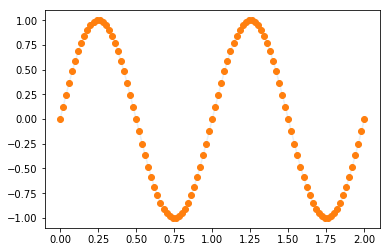

In [19]:
x[0:nt]=np.sin(2*np.pi*time[0:nt])
test= np.arange(1001)* (tmax-tmin) / 1000

plt.plot(test,np.sin(2*np.pi*test),'-',alpha=0.1)
plt.plot(time,x,'o');
plt.show()

<img style=" align:center display:inline" src="figures/ath.jpg" width="500"  alt="athlete" />


Velocity and acceleration are defined as the the first and second derivative of
position in time, respectively, therefore they can be approximated in function of the
time discretization:

$$v(t)=\frac{dx(t)}{dt}=\frac{x(t_i)-x(t_{i-1})}{t_i-t_{i-1}}=\frac{x_i-x_{i-1}}{\Delta t}$$<br/>
where we have assumed that ∆t = $t_{i+1} − t_i$ is independent from i. While intuitively
correct, the above approximation is however biased because oriented backward,
because approximating the derivative at time t(i) at its left side. A symmetric forward
formulation would be equally logical:

$$v(t)=\frac{dx(t)}{dt}=\frac{x(t_{i+1})-x(t_{i})}{t_{i+1}-t_{i}}=\frac{x_{i+1}-x_{i}}{\Delta t}$$


but it would be less practical since in many problems we do not know the future
position. The most natural definition of derivative is the centered one, that is just the
arithmetic average of the two:

$$v(t)=\frac{dx(t)}{dt}=\frac{1}{2} \left( {\frac{x(t_{i+1})-x(t_{i})}{t_{i+1}-t_{i}}+\frac{x(t_i)-x(t_{i-1})}{t_i-t_{i-1}}}\right)=\frac{x_{i+1}-x_{i-1}}{2\Delta t}$$

Although not sided backward or forward, this definition has the odd property of
not containing the term $x_i$ , i.e., the position at the time in which we want calculate the
velocity. This characteristic produces dispersion, i.e., the derivative is slightly more
flat than the other approximation. In other words the information on the behavior of
the derivative functions is diffused laterally. 


The acceleration can be either calculated as the first derivative of the velocity
in time or as the second derivative of position in time. The most compact and less
diffusive formulation to obtain acceleration from position is obtained by combining
backward and forward formulations:

$$a(t)=\frac{d^2x(t)}{dt^2}=\frac{x(t_{i+1})-2x{t_i}+x(t_{i})}{(t_{i+1}-t_{i-1})^2}=\frac{x_{i+1}-2x_i+x_{i-1}}{\Delta t^2}$$

Let us calculate the first derivative using the forward, backward and centered
definitions.

In [20]:
#nt=5
dxdtForward = np.zeros(nt)
dxdtBackward = np.zeros(nt)
dxdtCentered = np.zeros(nt)

We can now calculate the forward and backward derivatives. As we observed in
the past chapter, this operation is much faster if instead of a loop operators such as
for or while we use the properties NumPy arrays:

In [21]:
dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt
dxdtBackward[1:nt] = (x[1:nt]-x[0:nt-1])/dt

Using this definition we also observe that backward and forward derivatives in time
are the same, it just depends on whether dxdt is associated to time[1:nt]. Thinking
at the concept of the staggered grid that we just introduced, it means that either we
are shifting the grid backward or forward in time.
Different is the case for the centered derivative. This is in fact not immediately
defined at the edges, but only for nt − 2 points. We can use again the fast array
operations to define it as:

In [22]:
dxdtCentered[1:nt-1] = 0.5 * (dxdtForward[1:nt-1] + dxdtBackward[1:nt-1])
dxdtCentered

array([ 0.        ,  6.21724718,  6.06978298,  5.82659467,  5.49151749,
        5.0698358 ,  4.56819976,  3.99452049,  3.35784524,  2.66821477,
        1.93650496,  1.1742553 ,  0.39348694, -0.39348694, -1.1742553 ,
       -1.93650496, -2.66821477, -3.35784524, -3.99452049, -4.56819976,
       -5.0698358 , -5.49151749, -5.82659467, -6.06978298, -6.21724718,
       -6.26666168, -6.21724718, -6.06978298, -5.82659467, -5.49151749,
       -5.0698358 , -4.56819976, -3.99452049, -3.35784524, -2.66821477,
       -1.93650496, -1.1742553 , -0.39348694,  0.39348694,  1.1742553 ,
        1.93650496,  2.66821477,  3.35784524,  3.99452049,  4.56819976,
        5.0698358 ,  5.49151749,  5.82659467,  6.06978298,  6.21724718,
        6.26666168,  6.21724718,  6.06978298,  5.82659467,  5.49151749,
        5.0698358 ,  4.56819976,  3.99452049,  3.35784524,  2.66821477,
        1.93650496,  1.1742553 ,  0.39348694, -0.39348694, -1.1742553 ,
       -1.93650496, -2.66821477, -3.35784524, -3.99452049, -4.56

Notice that the allocation of the NumPy array was automatically performed by
Python, however dxdtCentered will be 19 elements long. We could have equally
defined it as dxdtCentered = (x[2:nt]-x[0:nt-2])/(2*dt), obtaining the same result.
Let us now plot the position in function of time using the Matplotlib tools that we
introduced before:

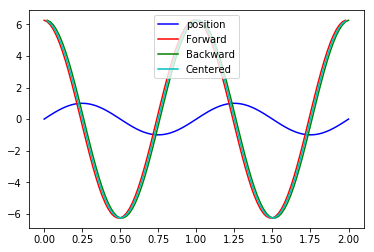

In [23]:
import matplotlib.pyplot as plt
plt.plot(time, x, color='b', label='position')
plt.plot(time[0:nt-1], dxdtForward[0:nt-1], color='r', label='Forward')
plt.plot(time[1:nt], dxdtBackward[1:nt], color='g', label='Backward')
plt.plot(time[1:nt-1], dxdtCentered[1:nt-1], color='c', label='Centered')
plt.legend(loc = 'upper center')
plt.show()
#print("\n \t \tFigure 4.1")

Figure(4.1) Three definitions of velocity: Forward, Backward, and Centered. The time on the
x-axis is discretized with 20 points. The three velocities almost overlap, but a shift is visible. 

In [24]:
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2

The array containing the second derivative dx2dt2 has the same length of dxdt-
Centered. We can plot now position, velocity, and acceleration together:

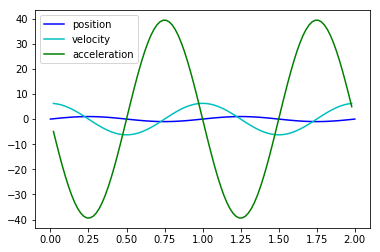

6.26666167821522
39.348694248957926


In [25]:
plt.plot(time,x,color='b',label='position')
plt.plot(time[1:nt-1],dxdtCentered[1:nt-1],color='c',label='velocity')
plt.plot(time[1:nt-1],d2xdt2,'g',label='acceleration')
plt.legend(loc='upper left')
plt.show()

print(dxdtCentered.max())
print(d2xdt2.max())

Figure (4.2)
Position, Centered Velocity, and Acceleration. The maximum values of the velocity is equal to 2 ∗ π
times the position, and so is maximum acceleration versus maximum velocity. The last value on
the right of the velocity and the edge values of the acceleration are missing

### 4.2 Integrate Acceleration

I assume that NumPy and matplotlib.pyplot are imported, and I will also use the
same values for nt, dt, intervals, tmin and tmax. Let’s initially define an array for
time.

In [26]:
import numpy as np
tmax = 2.0
tmin = 0.0
intervals = 50
dt =(tmax-tmin) / intervals
nt = intervals + 1
time = np.arange(nt) * dt

We expect that at every
integration the size of the arrays (velocity and position), will increase, opposite to
the derivative operator

In [27]:
acc = np.ones(nt) * (-10.0) #m/s2


Let us now create an empty vector that contains the velocity and let us initiate the
value at time t 0 = 0. Here I choose v 0 = 5.0 m/s:

In [28]:
vel = np.zeros(nt)
vel[0]=5.0 #m/s

Starting from the first value v o to the last one. For the specific case of constant
acceleration it is not relevant whether our integration is forward or backward, so we
can simply write:

In [29]:
for it in np.arange(nt-1):
    vel[it+1] = vel[it]+acc[it]*dt

Let us repeat the operation for the position. Note that the array’s length increases
at each integration. In this case the velocity is not constant, and the small difference between using the past or the next velocity value adds up when calculating the
position:

In [30]:
pos = np.zeros(nt)
pos[0] = 0.0 #m
for it in np.arange(nt-1):
    pos[it+1] = pos[it] + vel[it]*dt

In analogy with the past section, where I used the past velocity vel[it] to integrate
the position, I am here assuming a forward approximation. Calculating the average
between two velocities in two consecutive points will allow us to have a much better
estimate of the average velocity for every interval, and therefore avoid any kind of
bias. This can be implemented by creating a vector that contains this average velocity
and then use it for the integration:

In [31]:
posAve = np.zeros(nt)
velAverage = 0.5 * ( vel[0:nt-1] + vel[1:nt])
for it in np.arange(nt-1):
    posAve[it+1] = posAve[it] + velAverage[it]*dt

Using the plotting tools learned in the past section one can now visualize the
different results:

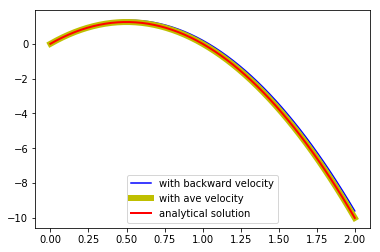

In [32]:
plt.plot(time,pos,color='b',label='with backward velocity')
plt.plot(time,posAve,color='y',linewidth=6,label='with ave velocity')
plt.plot(time,-0.5*10.*time**2+5.0*time,linewidth=2, color='r',label='analytical solution')
plt.legend(loc='lower center')
plt.show()

## 4.3 Projectile Trajectory

When we extend the procedure of Sect. 4.2 to two dimensions we obtain a trajectory
in space. The independent variable is always time, but we solve now for x(time) and
y(time) simultaneously. The solution represents the trajectory of the body. Assuming
a constant gravity acceleration vector g oriented toward the negative y direction, the
trajectory will depend only on the initial velocity v.

Let us assume that NumPy and Matplotlib.pyplot are loaded and that nt, dt,
intervals, tmin and tmax have the same values assumed in the past section. We
have now to find velocity and position in the x and in the y direction. If $v_0$ is the
initial speed and θ is the departure angle, then $v_{x0}$ = $v_0 cos(θ)$ and $v_{y0}$ = $v_0$ sin(θ):

In [51]:
theta=np.pi/6
v0=10.0 #m/s
gx=0.0; gy=-10.0 #m/s2
ax = np.ones(nt) * gx; ay = np.ones(nt) * gy
vx = np.zeros(nt); vy = np.zeros(nt)
vx[0]=v0*np.cos(theta)
vy[0]=v0*np.sin(theta)

We integrate the velocity field as before, but both in the x and y direction:

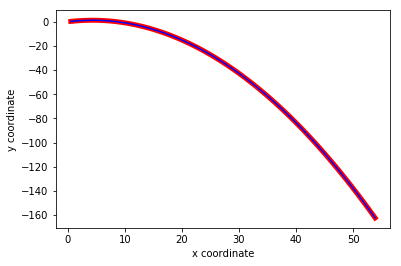

In [52]:
for it in np.arange(nt-1):
    vx[it+1] = vx[it]+ax[it]*dt
    vy[it+1] = vy[it]+ay[it]*dt
px = np.zeros(nt); py = np.zeros(nt)
vxAverage = 0.5 * ( vx[0:nt-2] + vx[1:nt-1])
vyAverage = 0.5 * ( vy[0:nt-2] + vy[1:nt-1])
for it in np.arange(nt-2):
    px[it+1] = px[it] + vxAverage[it]*dt
    py[it+1] = py[it] + vyAverage[it]*dt
    
pxBench=v0*np.cos(theta)*time
pyBench=v0*np.sin(theta)*time-0.5*10.0*time**2
plt.xlabel('x coordinate');plt.ylabel('y coordinate');
plt.plot(pxBench[1:nt-1], pyBench[1:nt-1], color='r', label='Benchmark',linewidth=5)
plt.plot(px[1:nt-1], py[1:nt-1], color='b', label='py vs px')
plt.show()

This graph is a intentionally left blank. We will use it to make animation in the later part of the program


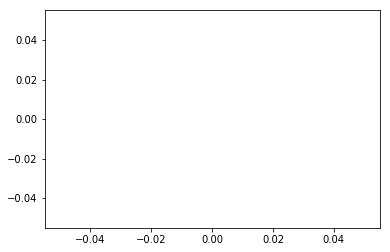

In [55]:
#animation 
%matplotlib inline
from IPython.display import Image
from matplotlib import animation, rc;from IPython.display import HTML
fig, axx = plt.subplots();
line, = axx.plot([], [],marker='o', markersize=10);
def sett(x1,x2,y1,y2,xl,yl,tit):
    axx.set_xlim(( x1,x2));axx.set_ylim((y1, y2));
    axx.set_title(tit)
    axx.set_ylabel(yl)
    axx.set_xlabel(xl)
    line, = axx.plot([], [], lw=2);
def init():
    line.set_data([], []);return (line,)
def animate(i,xx,rho,step,xtit,ytit,titl):
    sett(xx.min(),xx.max(),rho.min(),rho.max(),xtit,ytit,titl);line.set_data(xx[i], rho[i]);return (line,)
print("This graph is a intentionally left blank. We will use it to make animation in the later part of the program")

In [56]:
anim = animation.FuncAnimation(fig, animate, fargs=(px[1:nt-2],py[1:nt-2],nt-3,'X','Y','Projectile Motion',), init_func=init,frames=nt-3, interval=100, blit=True)
anim.save('projectile156.gif', writer='imagemagick')
Image(url='projectile156.gif')

## 4.4 Circular Motion

Let us consider an object in a circular orbit around the Earth. This trajectory will
be stable if the centripetal acceleration $v^2$ /r is equal to the gravity acceleration g, i.e.,
if v = $\sqrt{gr}$. Let us write a program that calculates exactly this orbit and let us use it
to calculate other trajectories. For simplicity, we assume a total time $t_{total}$ = 2π :

In [40]:
tmin = 0.0; tmax = 2*np.pi
intervals = 100
dt = (tmax-tmin) / intervals
nt = intervals + 1
time = np.arange(nt) * dt

If the trajectory is circular then x and y can be immediately calculated as

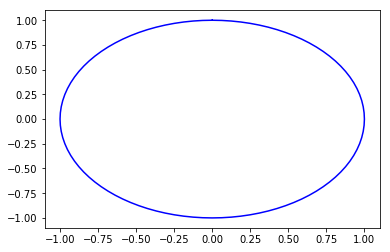

In [41]:
x = np.sin(time); y = np.cos(time)
plt.plot(x,y,'b',label='position')
plt.show()

as well as velocity and acceleration:

In [42]:
dxdt=(x[1:nt]-x[0:nt-1])/dt
dydt=(y[1:nt]-y[0:nt-1])/dt
d2xdt2=(x[0:nt-2]-2*x[1:nt-1]+x[2:nt])/dt**2
d2ydt2=(y[0:nt-2]-2*y[1:nt-1]+y[2:nt])/dt**2

In two dimensions, it might be interesting to plot velocities and acceleration as
vectors. This is possible by using the Matplotlib function plt.arrow. Let us plot some
velocity and acceleration vectors, for example, whose result is shown in Fig. 4.4:

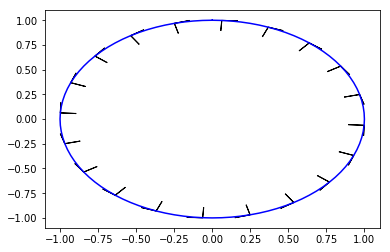

In [43]:
import numpy as np
import matplotlib.pyplot as plt
tmin = 0.0; tmax = 2*np.pi
intervals = 100
dt = (tmax-tmin) / intervals
nt = intervals + 1
time = np.arange(nt) * dt

x = np.sin(time); y = np.cos(time)
plt.plot(x,y,'b',label='position')


dxdt=(x[1:nt]-x[0:nt-1])/dt
dydt=(y[1:nt]-y[0:nt-1])/dt
d2xdt2=(x[0:nt-2]-2*x[1:nt-1]+x[2:nt])/dt**2
d2ydt2=(y[0:nt-2]-2*y[1:nt-1]+y[2:nt])/dt**2

numArrows = 20
aLen = 0.1
for it in np.arange(0,nt-1,int(nt/numArrows)):
    plt.arrow(x[it+1], y[it+1], dxdt[it]*aLen, dydt[it]*aLen,fc='g')
    plt.arrow(x[it+1], y[it+1], d2xdt2[it]*aLen, d2ydt2[it]*aLen,fc='r')
plt.show()


In [58]:
anim = animation.FuncAnimation(fig, animate, fargs=(x,y,nt-3,'X','Y','Circular Motion',), init_func=init,frames=nt-3, interval=100, blit=True)
anim.save('circular1.gif', writer='imagemagick')
Image(url='circular1.gif')